In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh1/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh1"])
df1 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh2/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh2"])
df2 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh3/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh3"])


In [15]:
params = pd.concat([df, df1, df2])

In [16]:
params = params.fillna(0)

In [17]:
params.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1,mmh2,mmh3
65,0.687730,0.586441,0.841202,6.194338e+00,5.374668e+00,0.002780,0.000260,1.040580,1.037472,12.446599,1.171576,1.0,0.0,0.0
58,0.385390,0.526996,0.658371,4.574723e-01,3.858141e+09,0.006908,0.005572,1.179254,0.990349,13.382491,1.139551,1.0,0.0,0.0
97,0.681728,0.493921,0.610791,5.855680e+01,8.615093e+11,0.010773,0.010090,1.047405,0.984981,14.472254,1.162759,1.0,0.0,0.0
7,0.763867,0.556291,0.722817,4.136175e+09,1.925034e+11,0.002701,0.000319,1.010894,1.004798,13.019277,1.165060,1.0,0.0,0.0
13,0.565032,0.502863,0.627442,6.851516e+01,3.721691e+12,0.002695,0.000787,1.107334,0.990295,14.259686,1.169569,1.0,0.0,0.0


In [18]:
params["mmh1"] = params["mmh1"]+2*params["mmh2"]+3*params["mmh3"]
params = params[params.columns[0:12]]
params["mmh1"] = params["mmh1"].astype(int)

In [19]:
params.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1
47,0.556897,0.629955,1.047066,1.958098e+02,2.507786,0.002829,0.001077,1.111913,1.089677,12.619791,1.234201,2
40,0.470139,0.676008,2.001011,9.892582e-01,0.411904,0.039013,0.044082,1.144216,1.239925,11.417493,1.203408,2
32,0.446817,0.414823,0.424870,4.032048e-01,0.969127,0.004067,0.001855,1.118068,0.873020,15.793934,1.059487,3
87,0.764764,0.609126,0.872968,8.345324e+09,2.839704,0.002532,0.000111,1.010801,1.035061,11.828552,1.148494,1
54,0.700223,0.597182,0.809216,9.398216e+09,3.908101,0.012503,0.012036,1.040743,1.018651,12.453014,1.166260,2


In [20]:
params['n1-n2'] = params ['n1'] - params['n2']

In [21]:
params.info()


<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 63
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      290 non-null    float64
 1   a2      290 non-null    float64
 2   a3      290 non-null    float64
 3   a4      290 non-null    float64
 4   a5      290 non-null    float64
 5   a6      290 non-null    float64
 6   a7      290 non-null    float64
 7   n1      290 non-null    float64
 8   n2      290 non-null    float64
 9   t_half  290 non-null    float64
 10  v_max   290 non-null    float64
 11  mmh1    290 non-null    int32  
 12  n1-n2   290 non-null    float64
dtypes: float64(12), int32(1)
memory usage: 30.6 KB


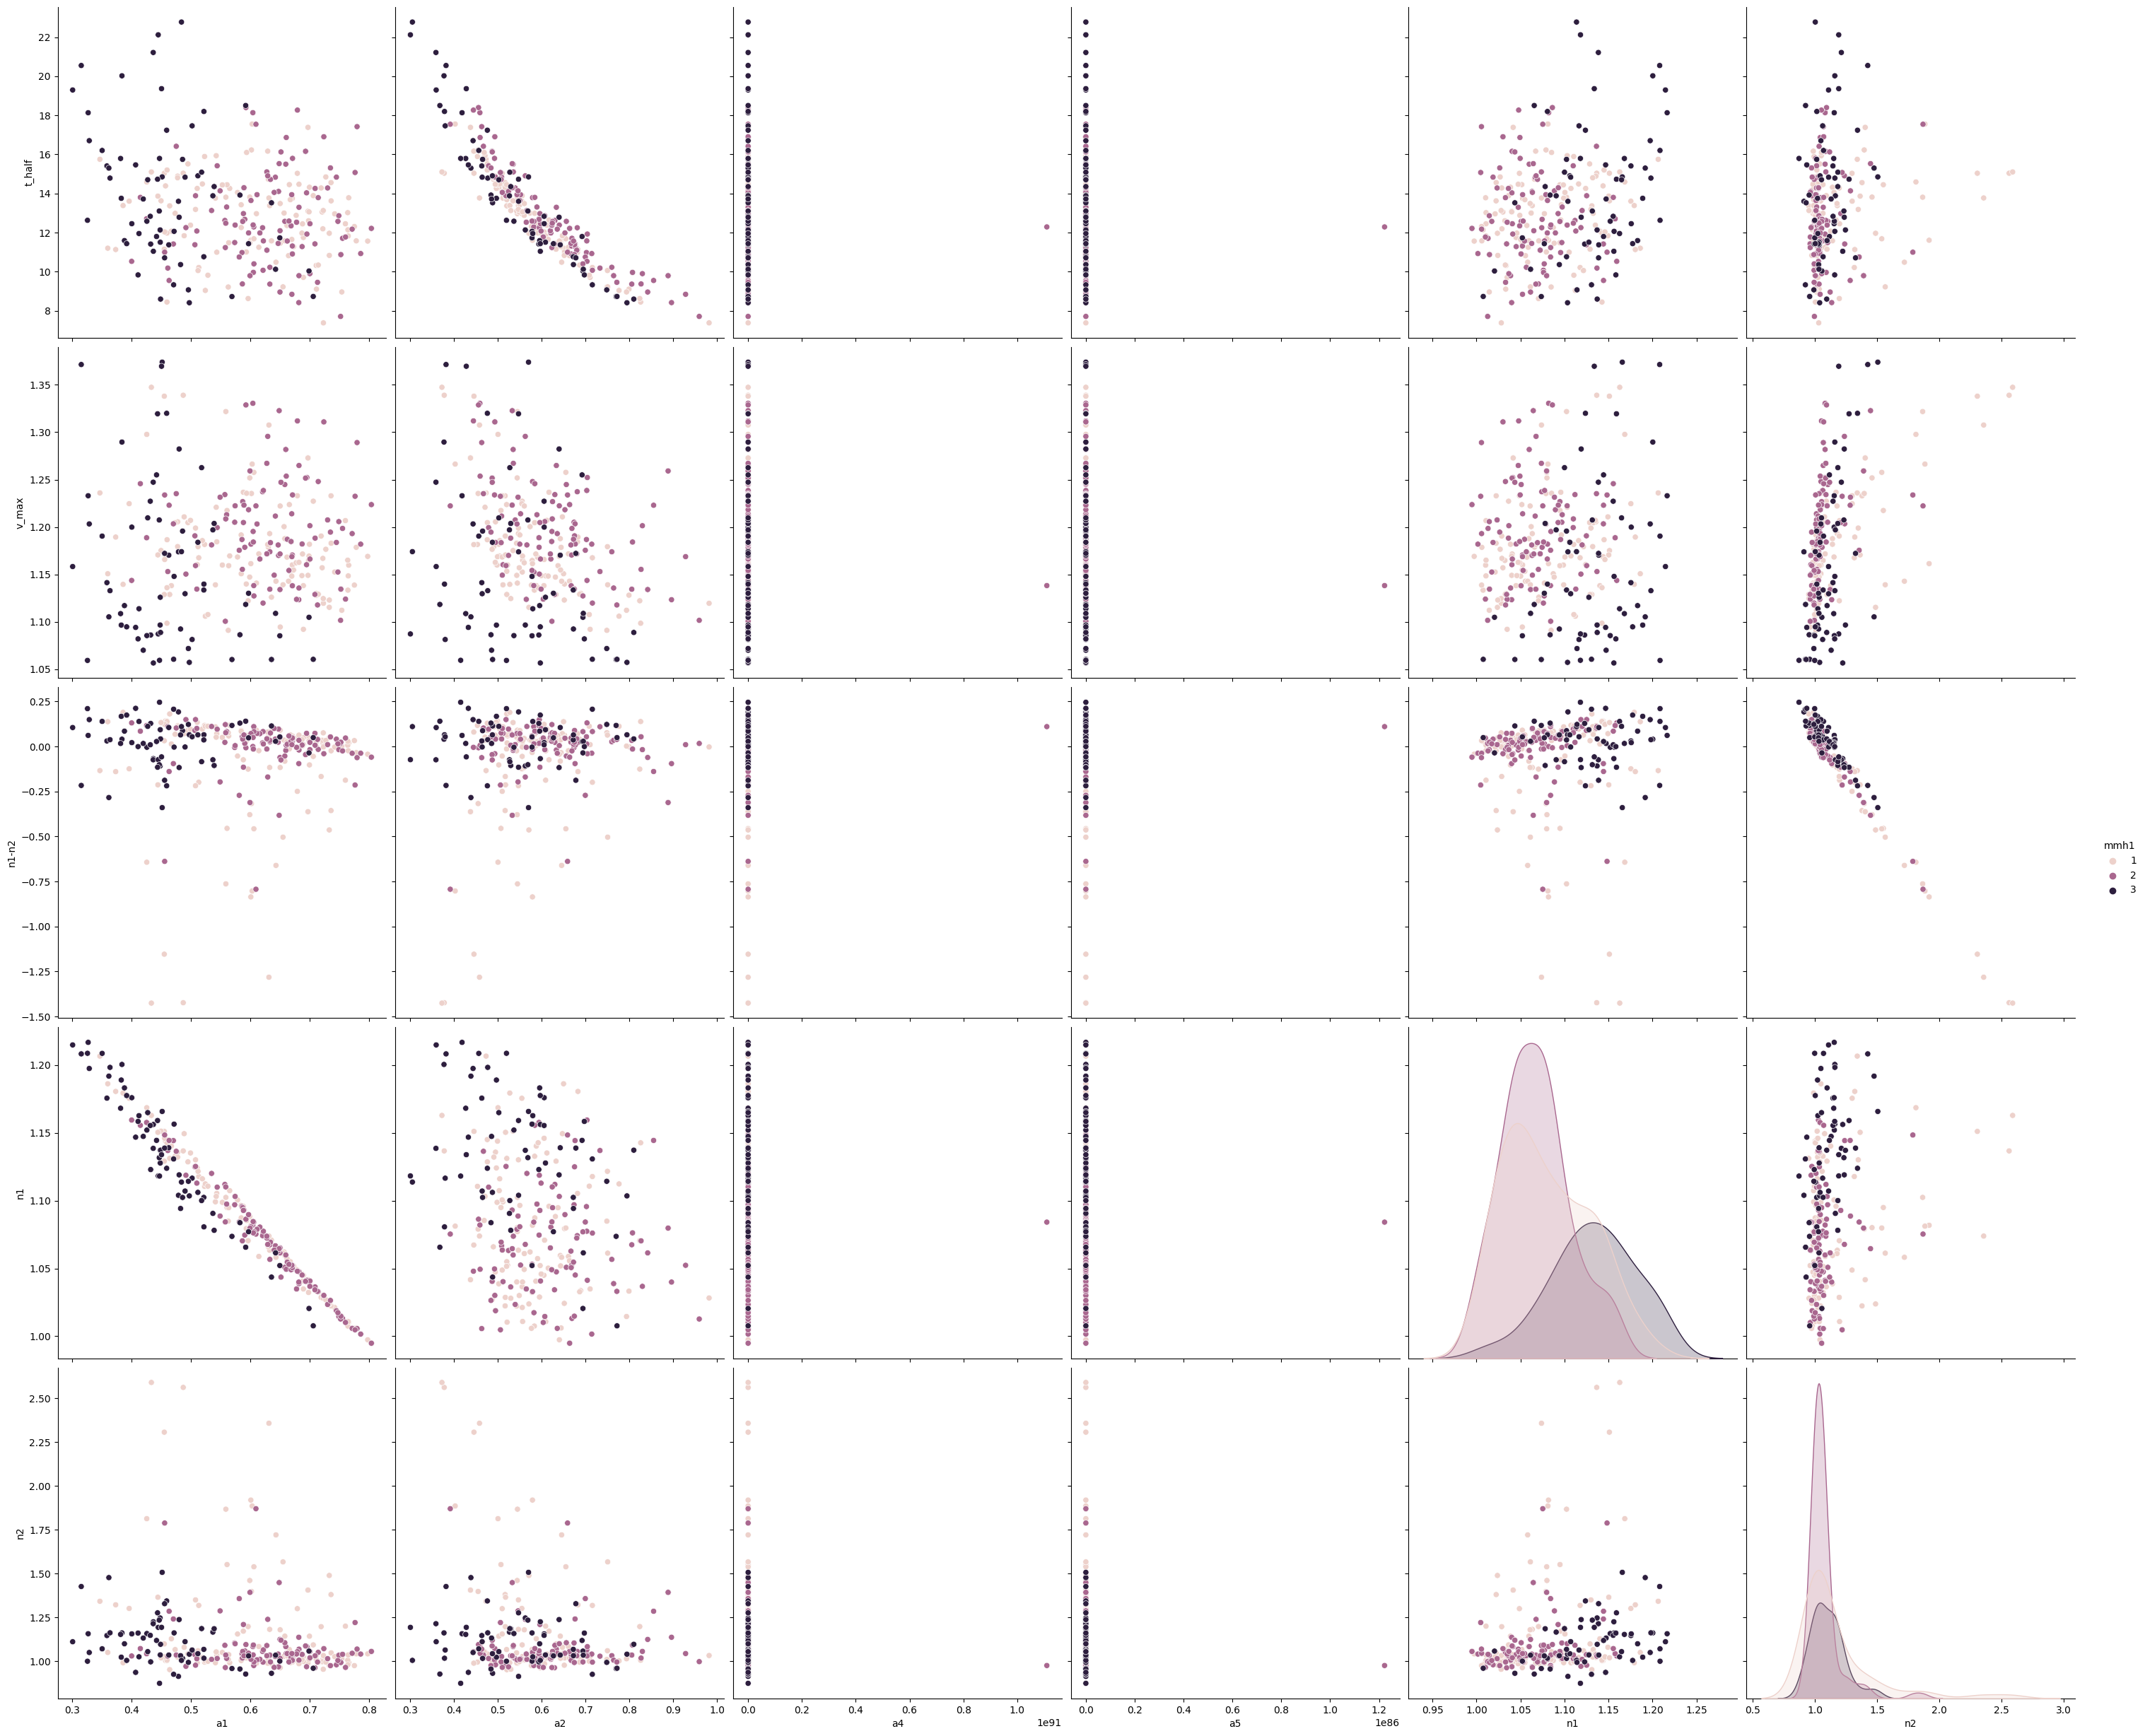

In [22]:
sns.pairplot(params, ## put the data frame here
                y_vars = ["t_half","v_max","n1-n2","n1","n2"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4","a5","n1","n2"], ## put a list of the desired horizontal variables here
                height = 5,
                hue="mmh1")

plt.show()

In [23]:
##count the number of each mmh1 type
params['mmh1'].value_counts()

mmh1
2    114
1    112
3     64
Name: count, dtype: int64

In [24]:
params['a4_log'] = params['a4'].apply(np.log10)
params['a5_log'] = params['a5'].apply(np.log10)

In [25]:
params_trimmed = params[params['a4'] <100]
params_trimmed = params_trimmed[params_trimmed['a5'] <100]

In [26]:
params_trimmed.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1,n1-n2,a4_log,a5_log
11,0.610093,0.544284,0.673063,3.273300,57.085941,0.002239,6.226916e-16,1.077160,0.987226,12.968609,1.140885,1,0.089935,0.514986,1.756529
65,0.687730,0.586441,0.841202,6.194338,5.374668,0.002780,2.603547e-04,1.040580,1.037472,12.446599,1.171576,1,0.003108,0.791995,0.730352
35,0.543935,0.478613,0.650934,2.076146,5.266942,0.004151,2.256591e-03,1.109895,1.014631,15.417778,1.199461,2,0.095265,0.317258,0.721558
21,0.395671,0.554537,2.012512,0.458267,0.354034,0.014460,1.471457e-02,1.175411,1.300049,13.605463,1.224647,1,-0.124638,-0.338882,-0.450956
10,0.635428,0.487800,0.554820,1.214047,1.987037,0.009962,1.067075e-02,1.043614,0.930171,13.524882,1.060346,3,0.113443,0.084236,0.298206


In [27]:
params_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 63
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      143 non-null    float64
 1   a2      143 non-null    float64
 2   a3      143 non-null    float64
 3   a4      143 non-null    float64
 4   a5      143 non-null    float64
 5   a6      143 non-null    float64
 6   a7      143 non-null    float64
 7   n1      143 non-null    float64
 8   n2      143 non-null    float64
 9   t_half  143 non-null    float64
 10  v_max   143 non-null    float64
 11  mmh1    143 non-null    int32  
 12  n1-n2   143 non-null    float64
 13  a4_log  143 non-null    float64
 14  a5_log  143 non-null    float64
dtypes: float64(14), int32(1)
memory usage: 17.3 KB


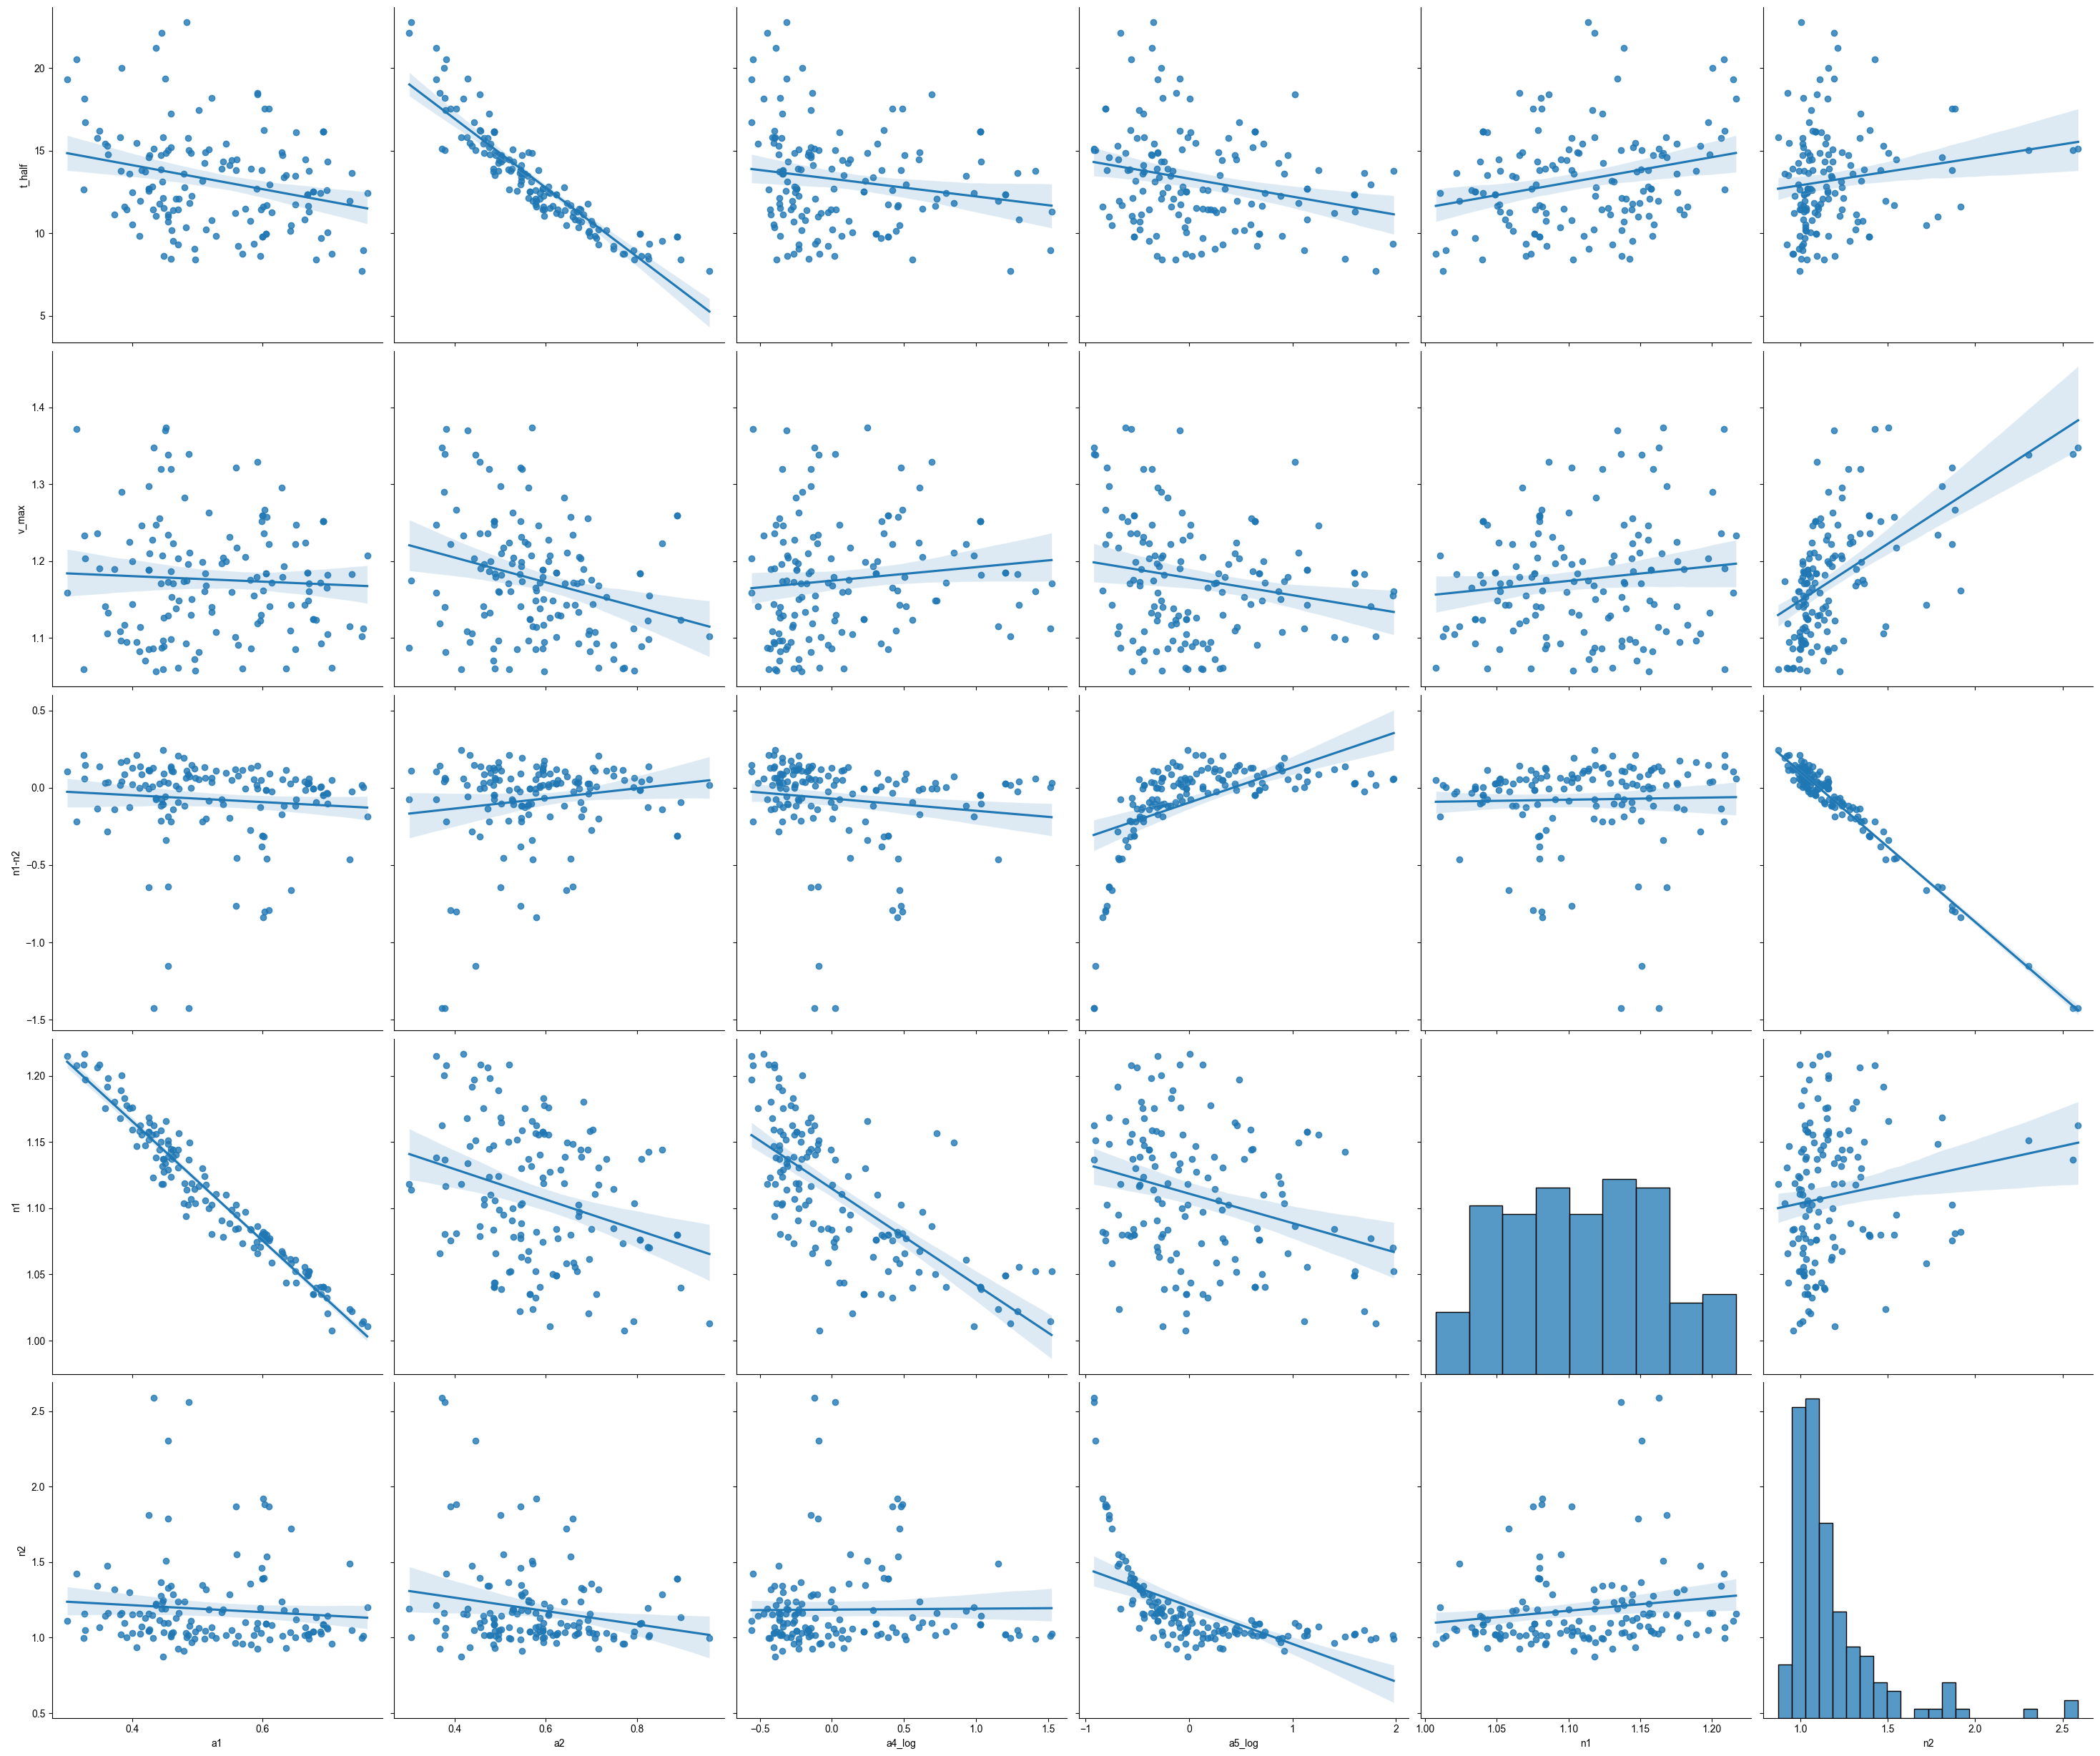

In [28]:
sns.pairplot(params_trimmed, ## put the data frame here
                y_vars = ["t_half","v_max","n1-n2","n1","n2"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4_log","a5_log","n1","n2"], ## put a list of the desired horizontal variables here
                height = 5,
                kind="reg")

                #hue="mmh1", palette="colorblind",
                #markers=["o", "s", "D"])
sns.set(font_scale=2)
plt.show()